In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import glob, os
import numpy as np
import datetime
from pathlib import Path

[Text(0, 0.5, 'Cost (Tardiness * $10^6$ + Makespan)'),
 Text(0.5, 0, 'Instance'),
 Text(0.5, 1.0, '')]

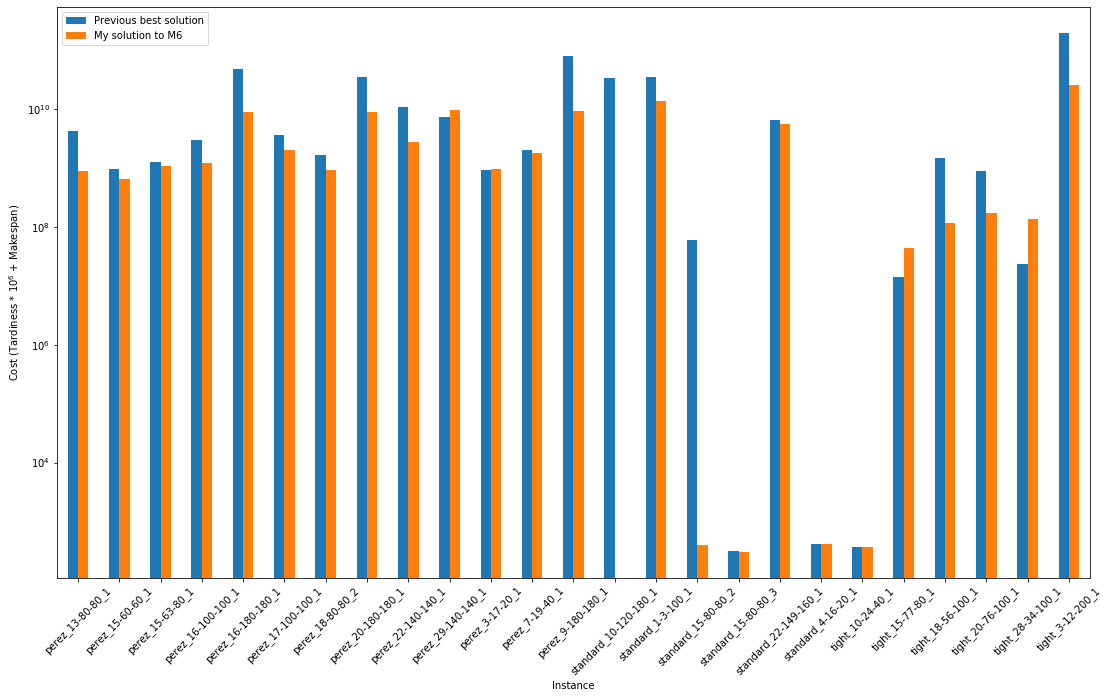

In [3]:
tardiness = [[4234, 874], [958, 633], [1256, 1079], [2917, 1228], [47234, 8789], [3649, 2007],
[1649, 903], [34619, 8780], [10542, 2783], [7130, 9645], [927, 957],
[1976, 1752], [78859, 9291], [33756, 0], [34442, 13338], [59, 0],
[0,0], [6467, 5491], [0,0], [0,0], [14, 43], [1455, 117], [877, 171],
[23, 134], [192462, 24995]]
                
makespan = [[673,360],[371,313],[496,343],[523,356],[1776,675],[532,356],
           [401,334],[1457,603],[683,431],[464,505],[520,611],[514,465],
           [2645,874],[2427,0],[7589,5909],[734,407],[322,304],[1072,1022],
           [409,409],[373,373],[644,443],[524,349],[580,309],[478,242],
           [7190,3184]]
cost = []
for i in range(len(tardiness)):
    cost.append({'Previous best solution':(tardiness[i][0]*1000000 + makespan[i][0]),
                'My solution to M6':(tardiness[i][1]*1000000 + makespan[i][1])})
    
instances = ["perez_13-80-80_1",
"perez_15-60-60_1",
"perez_15-63-80_1",
"perez_16-100-100_1",
"perez_16-180-180_1",
"perez_17-100-100_1",
"perez_18-80-80_2",
"perez_20-180-180_1",
"perez_22-140-140_1",
"perez_29-140-140_1",
"perez_3-17-20_1",
"perez_7-19-40_1",
"perez_9-180-180_1",
"standard_10-120-180_1",
"standard_1-3-100_1",
"standard_15-80-80_2",
"standard_15-80-80_3",
"standard_22-149-160_1",
"standard_4-16-20_1",
"tight_10-24-40_1",
"tight_15-77-80_1",
"tight_18-56-100_1",
"tight_20-76-100_1",
"tight_28-34-100_1",
"tight_3-12-200_1"]
    
df = pd.DataFrame(cost, 
                  index=instances)



ax = df.plot.bar(rot=0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation = 45)
plt.yscale("log")

ax.set(xlabel='Instance', ylabel='Cost (Tardiness * $10^6$ + Makespan)',
   title='')


    

import shutil
import datetime

# Move all 30 min SA files into a single folder

paths = ["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_1_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_2_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_3_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_4_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_5_long"]
output_path = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long"

for path in paths:
    os.chdir(path)
    print(path)
    for filename in glob.glob("*.info"):
        print(dst_dir)
        i = 1
        while True:
            src_dir= path + "\\" + filename
            dst_dir= output_path + "\\" + filename.split('.')[0] + "_" + str(i) + ".soln.info"
            if(os.path.exists(dst_dir)):
                i += 1
                continue
            shutil.copy(src_dir,dst_dir)
            break

In [4]:
import sys
import glob, os
import statistics
import numpy as np
import matplotlib.pyplot as plt


def get_info(solution, splitter_symbol = ':'):
    f = open(solution, "r")
    lines = f.read().split('\n')
    (tardiness, makespan) =  (0, 0)
    for line in lines:
        if 'Tardiness' in line:
            tardiness = int(line.split(splitter_symbol)[1])
        if 'Makespan' in line:
            makespan = int(line.split(splitter_symbol)[1])
    return (tardiness, makespan)

In [5]:
path_to_instances = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\instances.txt"


def load_info(path_to_runs, splitter_symbol = ':'):
    f = open(path_to_instances, "r")

    instances = f.read().split('\n')
    if '' in instances:
        instances.remove('')
    if ' ' in instances:
        instances.remove(' ')

    os.chdir(path_to_runs)
    solutions = glob.glob("*.info")

    scores_tardiness = {}
    scores_makespan = {}
    tardiness_list = []
    makespan_list = []
    for instance in instances:
        name = instance.split('.')[0]
        for solution in solutions:
            if name in solution or name.replace("s", "standard") in solution or name.replace("p", "perez") in solution or name.replace("t", "tight") in solution:
                (tardiness, makespan) = get_info(solution, splitter_symbol)
                tardiness_list.append(tardiness)
                makespan_list.append(makespan)
                if name in scores_tardiness:
                    scores_tardiness[name].append(tardiness)
                else:
                    scores_tardiness[name] = [tardiness]
                if name in scores_makespan:
                    scores_makespan[name].append(makespan)
                else:
                    scores_makespan[name] = [makespan]

    tardiness_median = {}
    tardiness_mean = {}
    makespan_median = {}
    makespan_mean = {}
    for (score, median, mean) in [(scores_tardiness, tardiness_median, tardiness_mean),
    (scores_makespan, makespan_median, makespan_mean)]:
        for key in score.keys():
            median[key] = statistics.median(score[key])
            mean[key] = statistics.mean(score[key])

    total_t_med = statistics.median(tardiness_list)
    total_t_mea = statistics.mean(tardiness_list)
    total_ms_med = statistics.median(makespan_list)
    total_ms_mea = statistics.mean(makespan_list)

    print("tardiness median: ",total_t_med, "\nTardiness mean: ", total_t_mea, "\n", total_ms_med, total_ms_mea)
    
    return tardiness_list

In [8]:
sa_1_t_mean = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long")

tardiness median:  73.5 
Tardiness mean:  662.4416666666667 
 1933.0 4478.6258333333335


In [9]:
sa_3_t_mean = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_3m_long")

tardiness median:  71.5 
Tardiness mean:  347.9275 
 1227.0 3862.3316666666665


In [10]:
sa_30_t_mean = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long")

tardiness median:  7.0 
Tardiness mean:  216.63333333333333 
 1012.5 3162.09


In [11]:
sa_1_max_t_mean = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-r" , '=')

tardiness median:  70.0 
Tardiness mean:  382.88708333333335 
 1327.0 3223.4358333333334


D:\Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


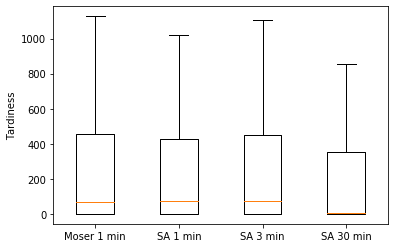

In [12]:
fig1, ax1 = plt.subplots()
ls_mean = [list(sa_1_max_t_mean), list(sa_1_t_mean), list(sa_3_t_mean), list(sa_30_t_mean)]
ax1.boxplot(ls_mean, showfliers=False)
ax1.set_xticklabels(['Moser 1 min', 'SA 1 min', 'SA 3 min', 'SA 30 min'])
plt.ylabel("Tardiness")
plt.show()

In [91]:
sa_1_T = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_T")
sa_1_S = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_S")
sa_1_P = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_P")

tardiness median:  76.5 
Tardiness mean:  115.385 
 1642.0 4537.94
tardiness median:  0.0 
Tardiness mean:  5.7175 
 2614.5 3454.085
tardiness median:  531.5 
Tardiness mean:  528.9826086956522 
 819.0 1065.5565217391304


In [117]:
sa_1_T = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_T", "=")
sa_1_S = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_S", "=")
sa_1_P = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_P", "=")

tardiness median:  76.5 
Tardiness mean:  110.29625 
 1208.5 3160.3275
tardiness median:  0.0 
Tardiness mean:  5.06375 
 1763.5 2314.46625
tardiness median:  620.0 
Tardiness mean:  1033.30125 
 812.0 4195.51375


tardiness median:  95063 
Tardiness mean:  761551.353041988 
 3377 7868.783204798629


D:\Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


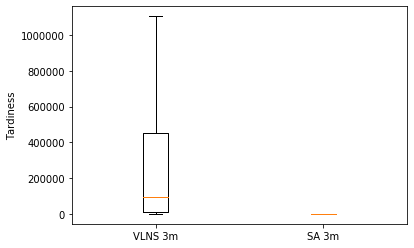

In [13]:
vlns_3m = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m")
fig1, ax1 = plt.subplots()
ls_vlns_mean = [list(vlns_3m), list(sa_3_t_mean)]
ax1.boxplot(ls_vlns_mean, showfliers=False)
ax1.set_xticklabels(['VLNS 3m', 'SA 3m'])
plt.ylabel("Tardiness")
plt.show()

In [14]:
vlns_3m_S = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_S")
vlns_3m_T = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_T")
vlns_3m_P = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_P")


tardiness median:  128234 
Tardiness mean:  209312.54959785522 
 5217 6345.461126005362
tardiness median:  105431.5 
Tardiness mean:  740394.1269035533 
 3198.5 7939.027918781726
tardiness median:  32120.5 
Tardiness mean:  1297353.905 
 1555.0 9220.09


tardiness median:  160616 
Tardiness mean:  1919818.4792899408 
 3761 14187.828402366864


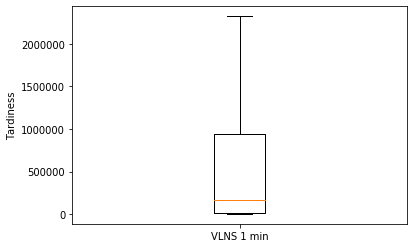

In [6]:
vlns_3m_bugfux = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_bugfix_py")
fig1, ax1 = plt.subplots()
ls_bugfix = [list(vlns_3m_bugfux)]
ax1.boxplot(ls_bugfix, showfliers=False)
ax1.set_xticklabels(['VLNS 3 min'])
plt.ylabel("Tardiness")
plt.show()